In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

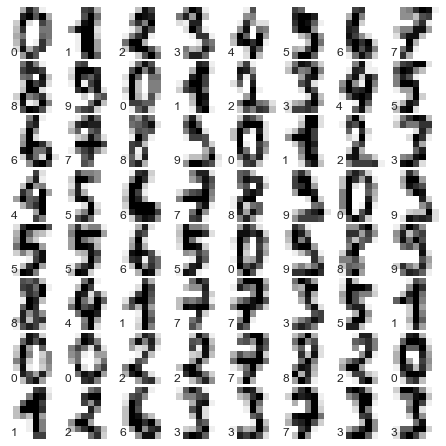

In [3]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
def knn(k, X_train, X_test, y_train, y_test, silence=False):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if not silence:
        print("\nkNN accuracy: {:.3f}".format(accuracy))
        print("Number of correct preds: {} / {}".format(np.sum(y_pred == y_test), len(y_test)))
    return y_pred, accuracy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

### Without scaling


kNN accuracy: 0.987
Number of correct preds: 444 / 450

kNN accuracy: 0.987
Number of correct preds: 444 / 450

kNN accuracy: 0.984
Number of correct preds: 443 / 450

kNN accuracy: 0.980
Number of correct preds: 441 / 450

kNN accuracy: 0.978
Number of correct preds: 440 / 450

kNN accuracy: 0.976
Number of correct preds: 439 / 450

kNN accuracy: 0.973
Number of correct preds: 438 / 450

kNN accuracy: 0.973
Number of correct preds: 438 / 450

kNN accuracy: 0.969
Number of correct preds: 436 / 450

kNN accuracy: 0.969
Number of correct preds: 436 / 450
Best k for kNN: 1


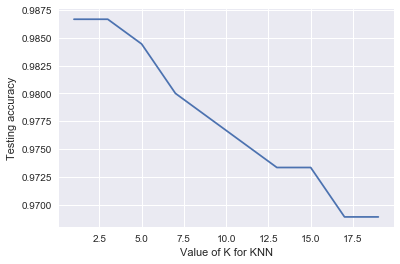

In [7]:
k_range = range(1, 21, 2)

scores = [knn(k, X_train, X_test, y_train, y_test)[1] for k in k_range]
best_k = [k_range[i] for i, j in enumerate(scores) if j == max(scores)][0]

print("Best k for kNN:", best_k)
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")
plt.show()

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


kNN accuracy: 0.971
Number of correct preds: 437 / 450

kNN accuracy: 0.969
Number of correct preds: 436 / 450

kNN accuracy: 0.976
Number of correct preds: 439 / 450

kNN accuracy: 0.973
Number of correct preds: 438 / 450

kNN accuracy: 0.964
Number of correct preds: 434 / 450

kNN accuracy: 0.964
Number of correct preds: 434 / 450

kNN accuracy: 0.958
Number of correct preds: 431 / 450

kNN accuracy: 0.951
Number of correct preds: 428 / 450

kNN accuracy: 0.951
Number of correct preds: 428 / 450

kNN accuracy: 0.951
Number of correct preds: 428 / 450
Best k for kNN: 5


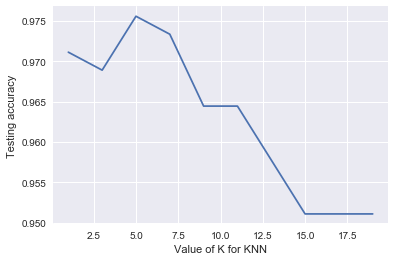

In [10]:
k_range = range(1, 21, 2)

scores = [knn(k, X_train_scaled, X_test_scaled, y_train, y_test)[1] for k in k_range]
best_k = [k_range[i] for i, j in enumerate(scores) if j == max(scores)][0]

print("Best k for kNN:", best_k)
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")
plt.show()


kNN accuracy: 0.984
Number of correct preds: 443 / 450
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        54
          1       1.00      0.95      0.97        41
          2       1.00      1.00      1.00        46
          3       0.98      1.00      0.99        51
          4       1.00      1.00      1.00        40
          5       0.95      0.98      0.96        41
          6       1.00      0.97      0.99        37
          7       1.00      0.98      0.99        47
          8       0.96      0.98      0.97        46
          9       0.96      0.98      0.97        47

avg / total       0.98      0.98      0.98       450



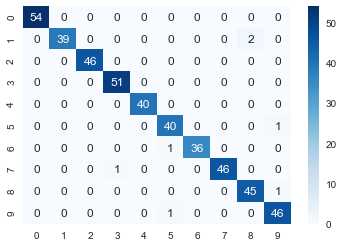

In [11]:
prediction = knn(best_k, X_train, X_test, y_train, y_test)[0]
sns.heatmap(confusion_matrix(prediction, y_test), cmap="Blues", annot=True)
print(classification_report(prediction, y_test))

### Decision tree


Decision tree accuracy: 0.864
Number of correct preds: 389 / 450
             precision    recall  f1-score   support

          0       0.98      0.96      0.97        55
          1       0.87      0.77      0.82        44
          2       0.76      0.90      0.82        39
          3       0.90      0.85      0.88        55
          4       0.78      0.89      0.83        35
          5       0.93      0.89      0.91        44
          6       0.97      0.90      0.93        39
          7       0.83      0.88      0.85        43
          8       0.74      0.80      0.77        44
          9       0.88      0.81      0.84        52

avg / total       0.87      0.86      0.87       450



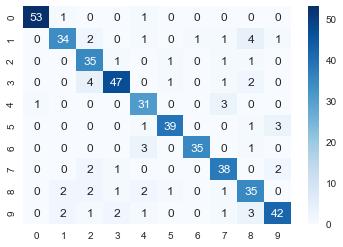

In [12]:
d_tree = DecisionTreeClassifier()
prediction = d_tree.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print("\nDecision tree accuracy: {:.3f}".format(accuracy))
print("Number of correct preds: {} / {}".format(np.sum(prediction == y_test), len(y_test)))
sns.heatmap(confusion_matrix(prediction, y_test), cmap="Blues", annot=True)
print(classification_report(prediction, y_test))

### Using gridsearch

In [13]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': np.arange(1, 30),
                  'max_features': np.arange(1, 64)}

grid_search_dt = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid)

grid_search_dt.fit(X_train, y_train)

print("Best Score: {}".format(grid_search_dt.best_score_))
print("Best params: {}".format(grid_search_dt.best_params_))

Best Score: 0.8552338530066815
Best params: {'max_depth': 26, 'max_features': 49}



Decision tree with grid search accuracy: 0.867
Number of correct preds: 390 / 450
             precision    recall  f1-score   support

          0       0.94      0.98      0.96        52
          1       0.90      0.81      0.85        43
          2       0.80      0.84      0.82        44
          3       0.85      0.90      0.87        49
          4       0.75      0.86      0.80        35
          5       0.95      0.91      0.93        44
          6       0.94      0.94      0.94        36
          7       0.91      0.91      0.91        46
          8       0.68      0.76      0.72        42
          9       0.94      0.76      0.84        59

avg / total       0.87      0.87      0.87       450



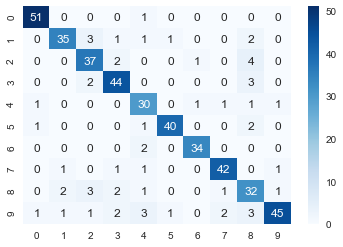

In [14]:
prediction = DecisionTreeClassifier(**grid_search_dt.best_params_).fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print("\nDecision tree with grid search accuracy: {:.3f}".format(accuracy))
print("Number of correct preds: {} / {}".format(np.sum(prediction == y_test), len(y_test)))
sns.heatmap(confusion_matrix(prediction, y_test), cmap="Blues", annot=True)
print(classification_report(prediction, y_test))

### Random forest


Random forest accuracy: 0.944
Number of correct preds: 425 / 450
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        53
          1       0.95      0.84      0.89        44
          2       0.96      0.98      0.97        45
          3       0.96      0.98      0.97        51
          4       0.95      0.93      0.94        41
          5       0.95      0.93      0.94        43
          6       1.00      0.95      0.97        38
          7       0.93      0.93      0.93        46
          8       0.87      0.95      0.91        43
          9       0.90      0.93      0.91        46

avg / total       0.95      0.94      0.94       450



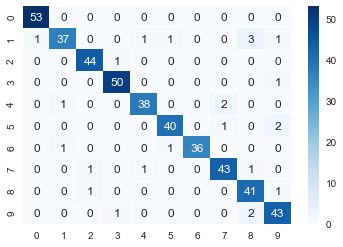

In [15]:
rand_f = RandomForestClassifier()
prediction = rand_f.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print("\nRandom forest accuracy: {:.3f}".format(accuracy))
print("Number of correct preds: {} / {}".format(np.sum(prediction == y_test), len(y_test)))
sns.heatmap(confusion_matrix(prediction, y_test), cmap="Blues", annot=True)
print(classification_report(prediction, y_test))

In [16]:
rand_forest_cv = RandomForestClassifier()

parameter_grid = {'max_depth': np.arange(1, 30)}

grid_search_rf = GridSearchCV(rand_forest_cv, param_grid = parameter_grid)

grid_search_rf.fit(X_train, y_train)

print("Best Score: {}".format(grid_search_rf.best_score_))
print("Best params: {}".format(grid_search_rf.best_params_))

Best Score: 0.9376391982182628
Best params: {'max_depth': 11}



Random forest with grid search accuracy: 0.944
Number of correct preds: 425 / 450
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        53
          1       0.95      0.86      0.90        43
          2       0.91      1.00      0.95        42
          3       0.92      0.91      0.91        53
          4       0.97      0.95      0.96        41
          5       0.95      1.00      0.98        40
          6       1.00      0.95      0.97        38
          7       0.98      0.94      0.96        48
          8       0.89      0.89      0.89        47
          9       0.90      0.96      0.92        45

avg / total       0.95      0.94      0.94       450



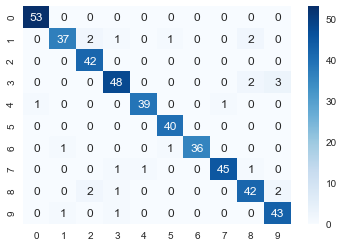

In [17]:
prediction = RandomForestClassifier(**grid_search_rf.best_params_).fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print("\nRandom forest with grid search accuracy: {:.3f}".format(accuracy))
print("Number of correct preds: {} / {}".format(np.sum(prediction == y_test), len(y_test)))
sns.heatmap(confusion_matrix(prediction, y_test), cmap="Blues", annot=True)
print(classification_report(prediction, y_test))

In [18]:
clf1 = DecisionTreeClassifier(**grid_search_dt.best_params_)
clf2 = RandomForestClassifier(**grid_search_rf.best_params_)
clf3 = KNeighborsClassifier(n_neighbors=best_k)
clf4 = LogisticRegression()

C_range = 10. ** np.arange(3, 7)
gamma_range = 10. ** np.arange(-6, -1)
param_grid = dict(gamma=gamma_range, C=C_range)
clf5 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid)

In [19]:
eclf = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('kn', clf3), ('lr', clf4), ('sv', clf5)], voting='soft')
eclf = eclf.fit(X_train, y_train)

/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Ensemble accuracy: 0.989
Number of correct preds: 445 / 450
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        54
          1       1.00      0.95      0.97        41
          2       1.00      1.00      1.00        46
          3       0.96      1.00      0.98        50
          4       1.00      1.00      1.00        40
          5       0.98      1.00      0.99        41
          6       1.00      1.00      1.00        36
          7       1.00      0.96      0.98        48
          8       0.96      1.00      0.98        45
          9       1.00      0.98      0.99        49

avg / total       0.99      0.99      0.99       450



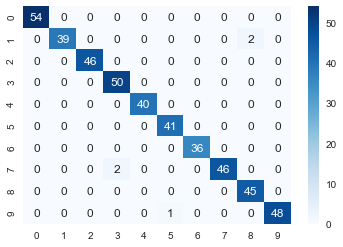

In [20]:
prediction = eclf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print("\nEnsemble accuracy: {:.3f}".format(accuracy))
print("Number of correct preds: {} / {}".format(np.sum(prediction == y_test), len(y_test)))
sns.heatmap(confusion_matrix(prediction, y_test), cmap="Blues", annot=True)
print(classification_report(prediction, y_test))

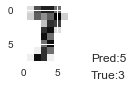

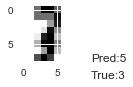

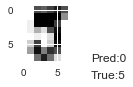

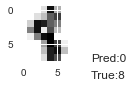

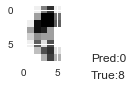

In [21]:
for i, j in zip(X_test[prediction != y_test], y_test[prediction != y_test]):
    plt.figure(figsize=(1,1))
    plt.imshow(i.reshape(8, 8), cmap=plt.cm.binary, interpolation='nearest', )
    plt.text(10, 10, "True:" + str(j))
    plt.text(10, 7.5, "Pred:" + str(prediction[j]))
    plt.show()